## US-based housing company named Surprise Housing has decided to enter the Australian market.
## The requirement is to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The solution is divided into the following sections: 
###  1. Data understanding and exploration
###  2. Data cleaning
###  3. Data preparation
###  4. Model building 
###  5. Feature selection/elimination using Lasso
###  6. Use the selected features in Ridge
###  7.Model Evaluation

In [639]:
# Importing Pandas and NumPy
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm, skew
from scipy import stats
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')

In [640]:
train_house_price          = pd.read_csv("train.csv",encoding="ISO-8859-1",delimiter = ",")
test_house_price     = pd.read_csv("test.csv",encoding="ISO-8859-1",delimiter = ",")
train_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [641]:
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [642]:
train_ID = train_house_price['Id']
train_house_price.drop("Id", axis = 1, inplace = True)
train_house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [643]:
train_house_price.shape

(1460, 80)

In [644]:
test_house_price.shape

(1459, 80)

### Number of numerical and categorical features

In [645]:
categorical = len(train_house_price.select_dtypes(include=['object']).columns)
numerical = len(train_house_price.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorical, 'categorical', '+',
      numerical, 'numerical', '=', categorical+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


In [646]:
categorical = len(test_house_price.select_dtypes(include=['object']).columns)
numerical = len(test_house_price.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorical, 'categorical', '+',
      numerical, 'numerical', '=', categorical+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


## Missing/null value analysis

In [647]:
house_price=train_house_price


### Drop columns with more than 75% null 

In [648]:
# This is for checking which are the particular columns that has more than say 75% null entries
house_price.columns[round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2) > 75]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [649]:
features_drop = ['PoolQC','MiscFeature','Alley','Fence']
house_price = house_price.drop(features_drop, axis=1)
test_house_price = test_house_price.drop(features_drop, axis=1)

In [650]:
# This tells you the percentage of null values in each column
round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [651]:
# This is for checking which are the particular columns that has more than say 20% null entries
house_price.columns[round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2) > 20]

Index(['FireplaceQu'], dtype='object')

In [652]:
house_price = house_price.drop('FireplaceQu', axis=1)
test_house_price = test_house_price.drop('FireplaceQu', axis=1)

In [653]:
house_price.columns[round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2) > 10]

Index(['LotFrontage'], dtype='object')

### LotFrontage is imputed with meadian value as street connected to the area can be common based on the neighbourhood. Hence , impute LotFrontage with median value based on Neighborhood.

In [654]:
house_price["LotFrontage"] = house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [655]:
test_house_price["LotFrontage"] = test_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [656]:
house_price.columns[round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2) > 5]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [657]:
house_price["GarageType"] = house_price["GarageType"].fillna("None")
house_price["GarageYrBlt"] = house_price["GarageYrBlt"].fillna(0)
house_price["GarageFinish"] = house_price["GarageFinish"].fillna("None")
house_price["GarageQual"] = house_price["GarageQual"].fillna("None")
house_price["GarageCond"] = house_price["GarageCond"].fillna("None")

In [658]:
test_house_price["GarageType"] = test_house_price["GarageType"].fillna("None")
test_house_price["GarageYrBlt"] = test_house_price["GarageYrBlt"].fillna(0)
test_house_price["GarageFinish"] = test_house_price["GarageFinish"].fillna("None")
test_house_price["GarageQual"] = test_house_price["GarageQual"].fillna("None")
test_house_price["GarageCond"] = test_house_price["GarageCond"].fillna("None")

In [659]:
house_price.columns[round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2) > 0.1]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2'],
      dtype='object')

In [660]:
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    house_price[column] = house_price[column].fillna('None')

In [661]:
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    test_house_price[column] = test_house_price[column].fillna('None')

In [662]:
print(house_price['MasVnrArea'].mode()[0])

0.0


In [663]:
print(test_house_price['MasVnrArea'].mode()[0])

0.0


In [664]:
house_price["MasVnrArea"] = house_price["MasVnrArea"].fillna(0)

In [665]:
test_house_price["MasVnrArea"] = test_house_price["MasVnrArea"].fillna(0)

In [666]:
# This tells you the percentage of null values in each column
round(100 *(house_price.isnull().sum(axis=0)/house_price.shape[0]),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [667]:
# This tells you the percentage of null values in each column
round(100 *(test_house_price.isnull().sum(axis=0)/test_house_price.shape[0]),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.27
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.14
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.07
Exterior2nd      0.07
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
                 ... 
GrLivArea        0.00
BsmtFullBath     0.14
BsmtHalfBath     0.14
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.07
TotRmsAbvGrd     0.00
Functional       0.14
Fireplaces       0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars

In [668]:
test_house_price = test_house_price.dropna(how='any')

In [669]:
house_price = house_price.dropna(how='any')

## Univariate Analysis

In [670]:
#statistics of the response variable variable (saleprice)
house_price.SalePrice.describe().round(2)

count      1459.00
mean     180930.39
std       79468.96
min       34900.00
25%      129950.00
50%      163000.00
75%      214000.00
max      755000.00
Name: SalePrice, dtype: float64

### Check the distribution of response variable.

Text(0.5, 1.0, 'SalePrice distribution')

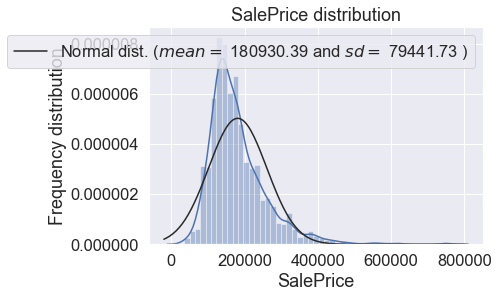

In [671]:
#check the distribution of SalePrice
sns.distplot(house_price['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mean, sd) = norm.fit(house_price['SalePrice'])
plt.legend(['Normal dist. ($mean=$ {:.2f} and $sd=$ {:.2f} )'.format(mean, sd)],loc='best')
plt.ylabel('Frequency distribution')
plt.title('SalePrice distribution')




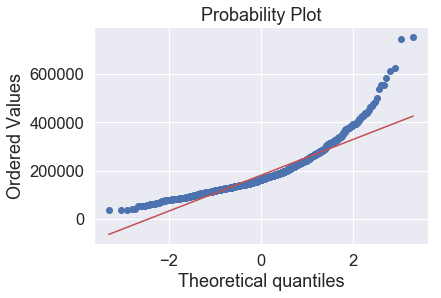

In [672]:
fig = plt.figure()
res = stats.probplot(house_price['SalePrice'], plot=plt)
plt.show()


In [673]:
print('Kurtosis = ', house_price['SalePrice'].kurtosis())
print('Skew     = ', house_price['SalePrice'].skew())

Kurtosis =  6.529263049673958
Skew     =  1.8819429948035529


### In the above plots, response variable is not fully normally distributed. Hence this has to be fixed
### Skew is > 1, the data is highly skewed 
### Kurtosis > 3, the data is having outliers.

## Let us analyse categorical and numerical features by countplot and histogram respectively

In [674]:
numerical_features=house_price.dtypes[house_price.dtypes != "object"].index
numerical_features=numerical_features.drop('SalePrice')


In [675]:
categorical_features=house_price.dtypes[house_price.dtypes == "object"].index


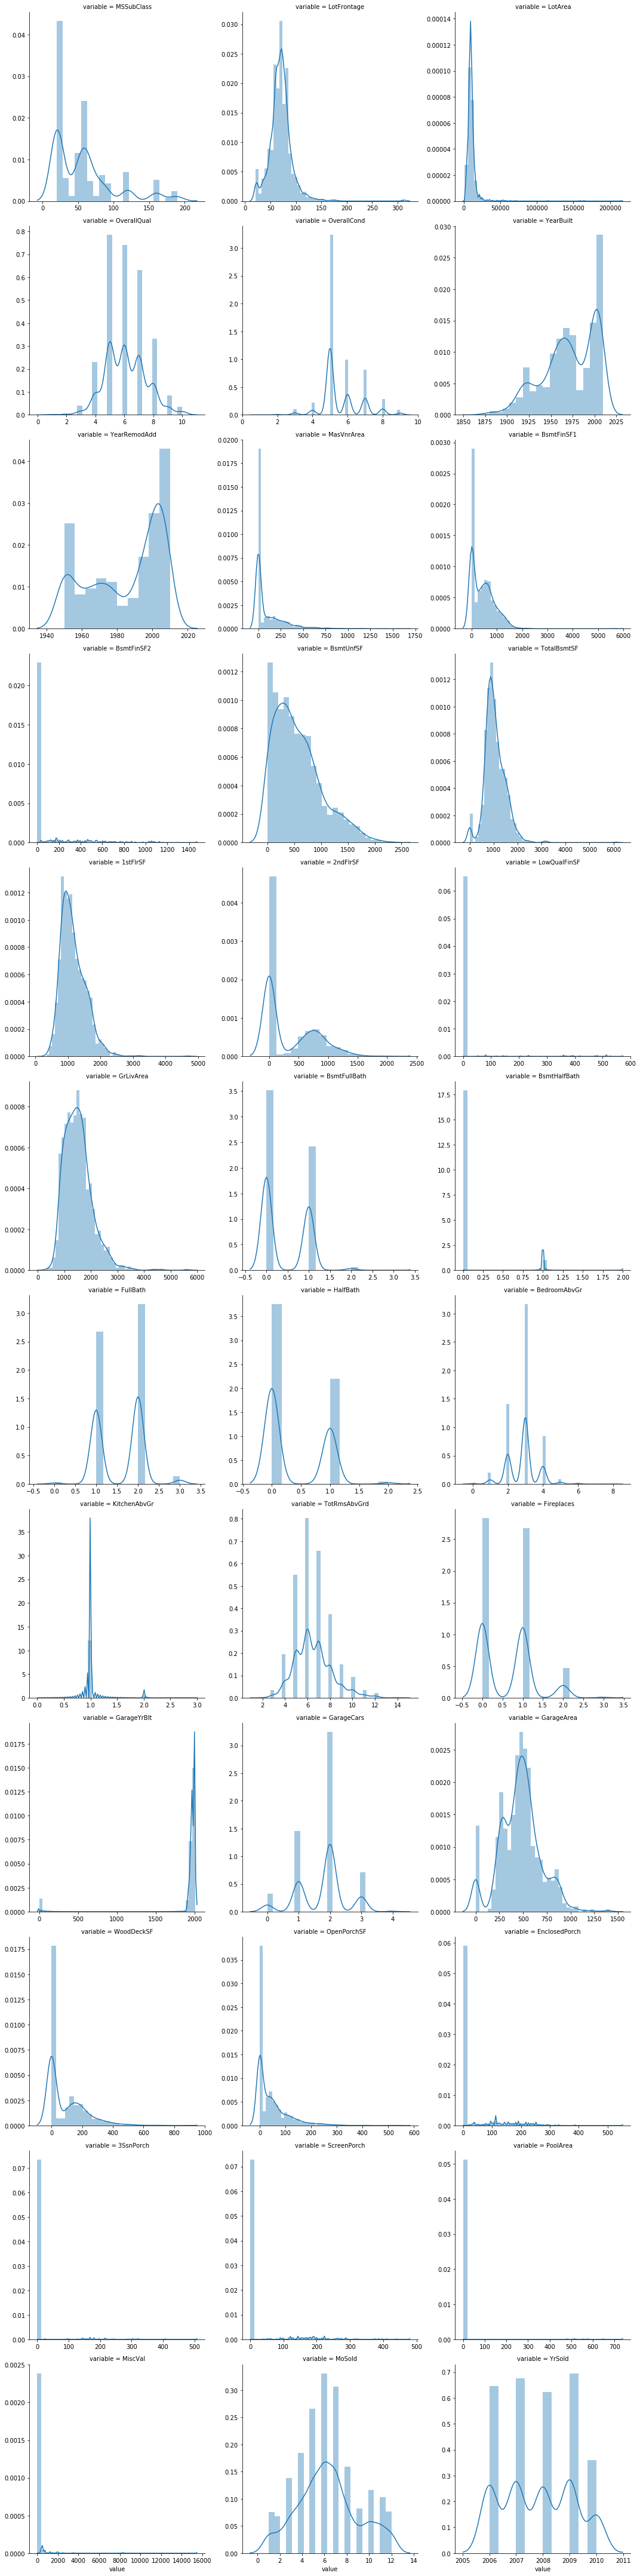

In [37]:
f = pd.melt(house_price, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value")
plt.show()

##  There are some numeric features with discrete values, hence this column will be converted as categorical ,ex: OverallQual
##  For some most common value is 0

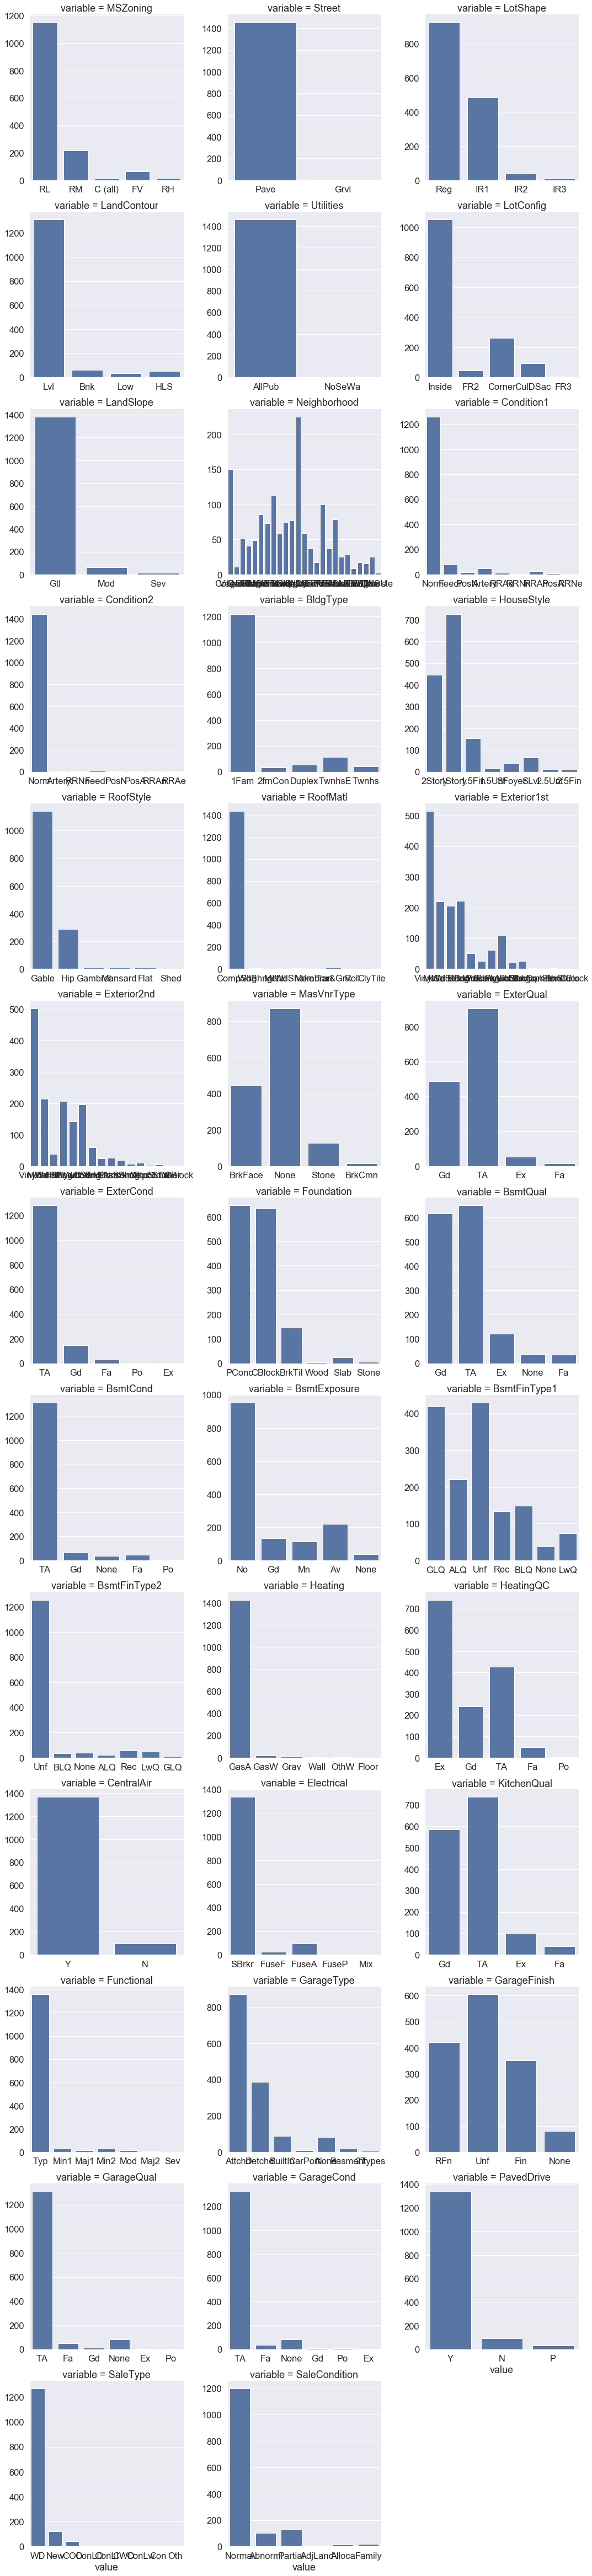

In [366]:
f = pd.melt(house_price, value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value")
plt.show()


## There are certain features which have significant difference like Street,Utilities
  

In [676]:
house_price["Street"].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [677]:
house_price["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [678]:
house_price["MoSold"].value_counts()

6     253
7     234
5     203
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [679]:
house_price["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64

In [680]:
house_price["OverallCond"].value_counts()

5    820
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [681]:
house_price["Utilities"].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [682]:
#there is only one value for NoSewa and all others have value AllPub. So, this feature has no signicance if we divide the data in test and train
house_price=house_price.drop(['Utilities'], axis=1)

In [683]:
test_house_price=test_house_price.drop(['Utilities'], axis=1)

In [684]:
house_price.shape

(1459, 74)

In [685]:
test_house_price.shape

(1447, 74)

## Bivariate Analysis
## Scatter plot for numerical features

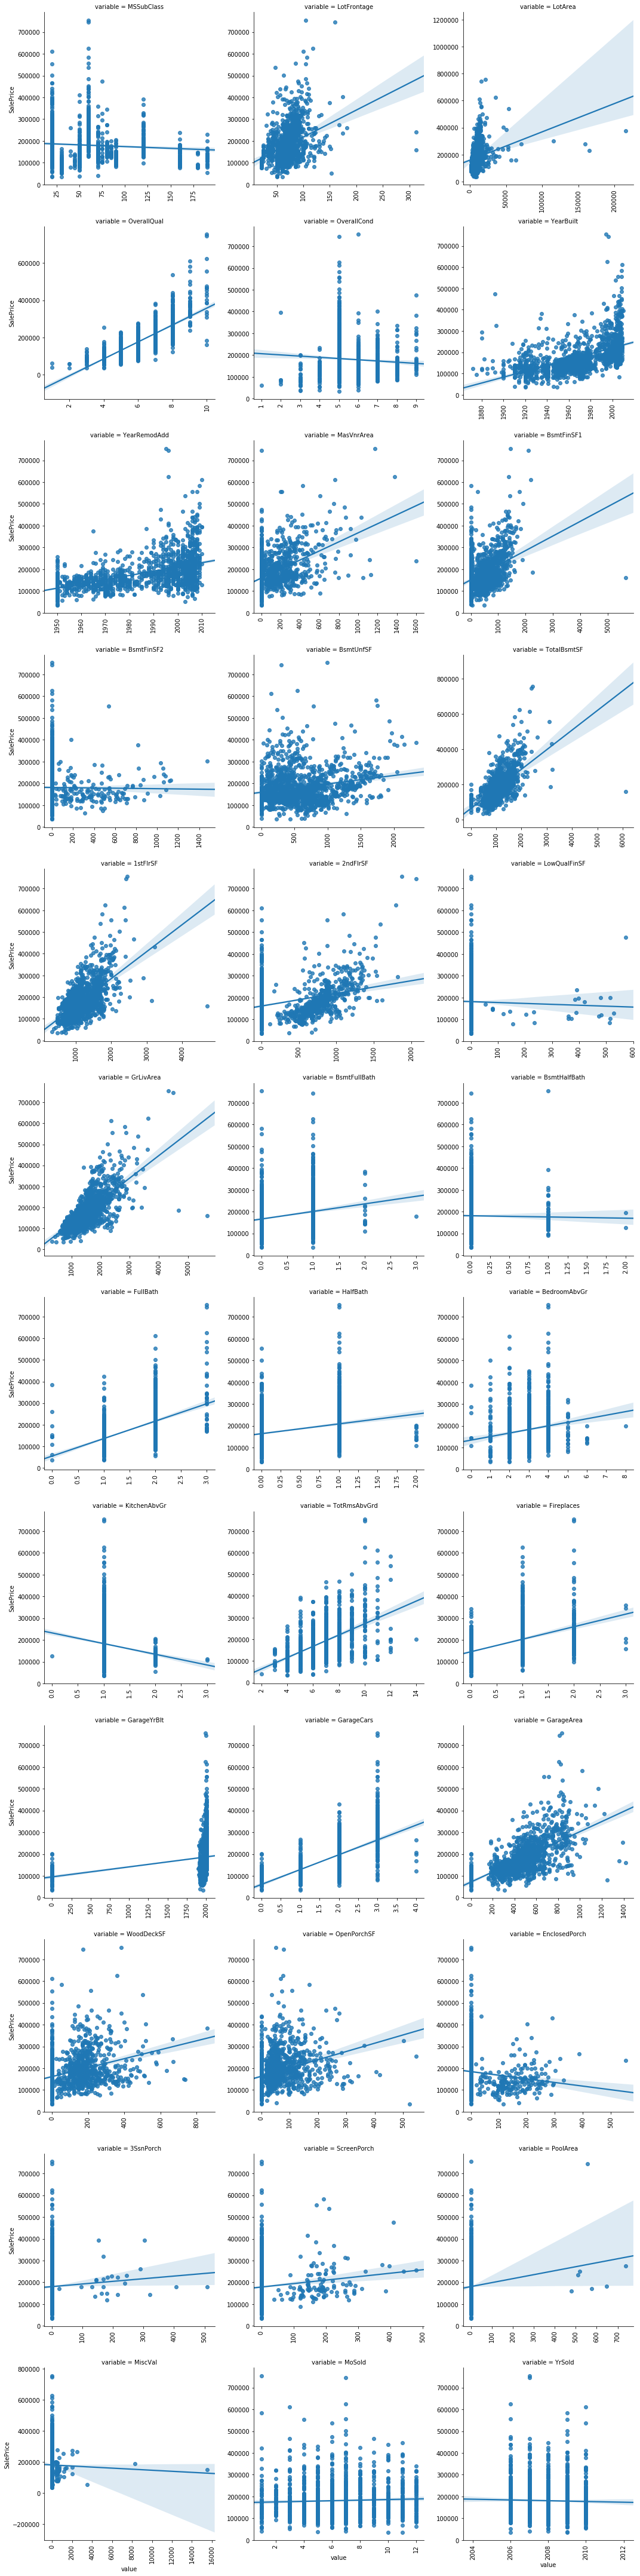

In [336]:
def regplot(x, y, **kwargs):
    sns.regplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(house_price, id_vars=['SalePrice'], value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(regplot, "value", "SalePrice")
plt.show()

#### From the above, Sale price increases with GrLivArea, it also has outliers.

### Collinearity

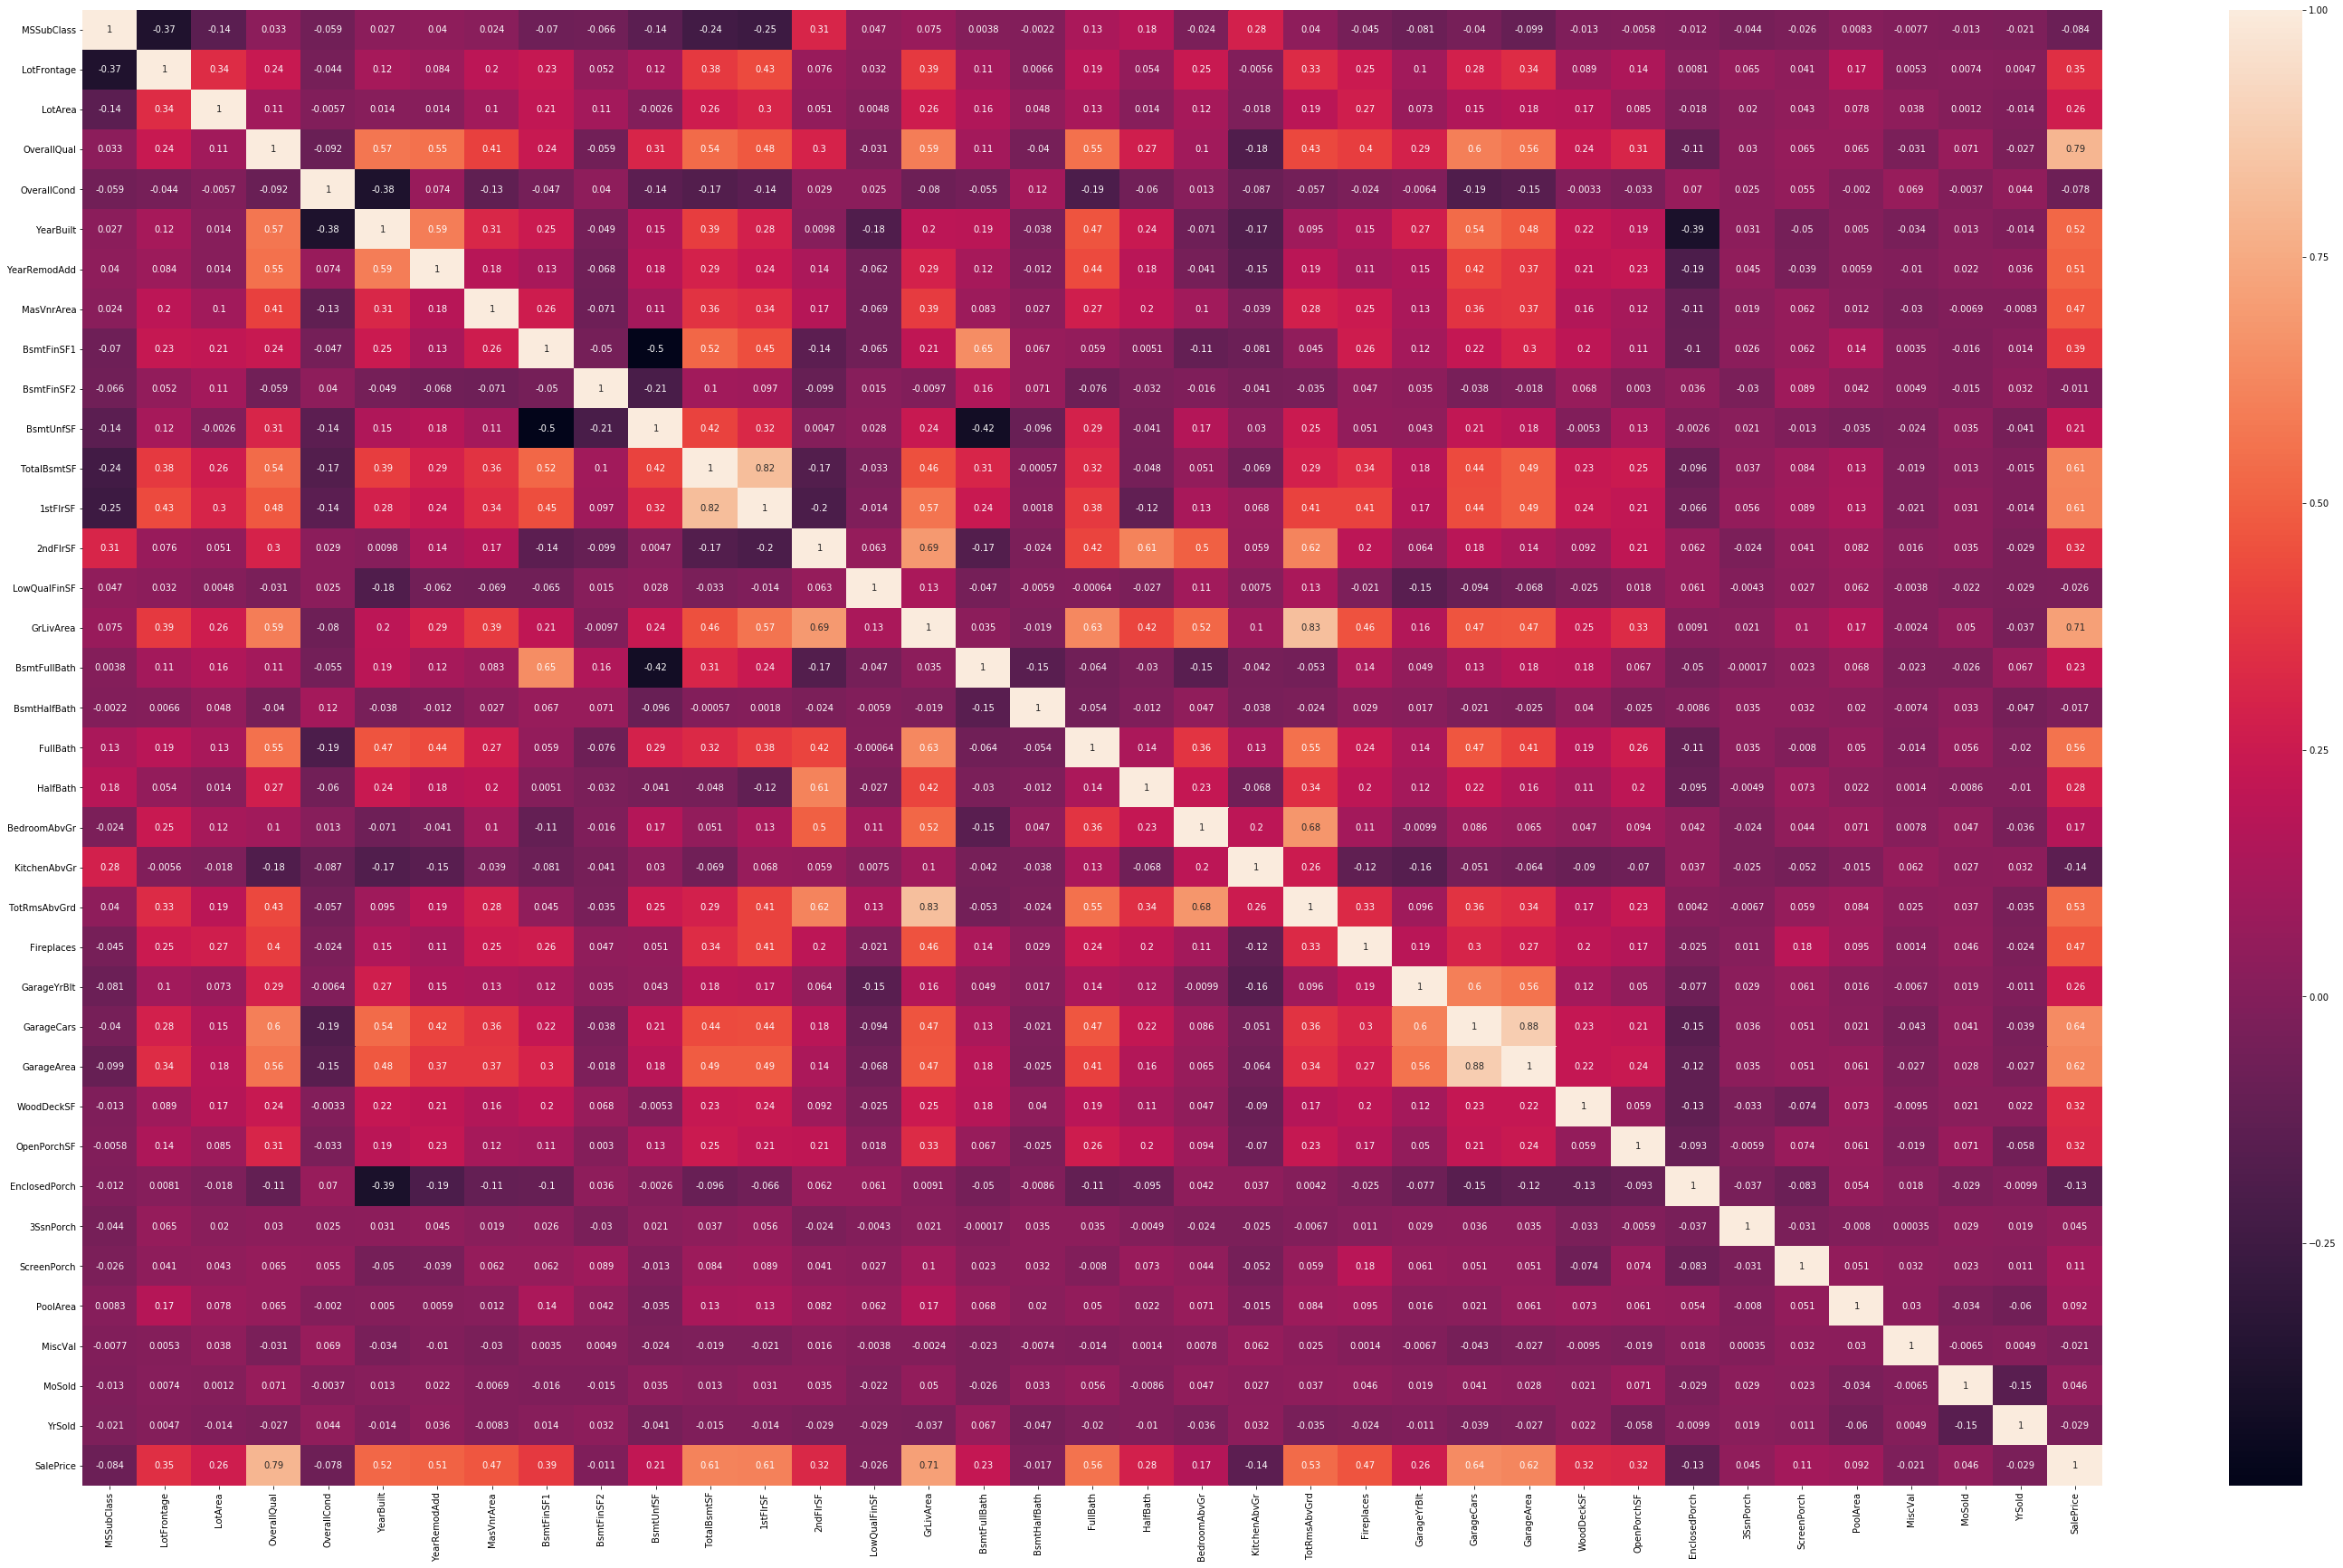

In [337]:
# Let's see the correlation matrix 
corr_matrix=house_price.corr()
plt.figure(figsize=(50,30))# Size of the figure
sns.heatmap(house_price.corr(),annot = True)
plt.show()

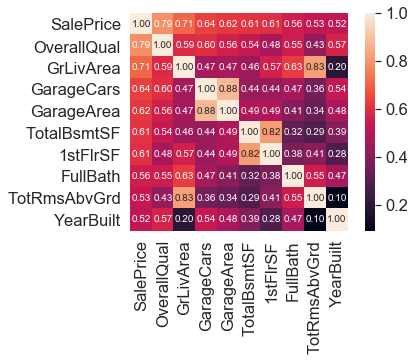

In [338]:
# The above plot is not very clear, let us find the top 10 most co-rrelated variables
var = 10 #number of variables for heatmap
columns = corr_matrix.nlargest(var, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_price[columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [339]:
most_corr_feat = pd.DataFrame(columns)
most_corr_feat.columns = ['Most_Correlated_Features']
most_corr_feat

,Most_Correlated_Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


### Garagearea and Garage Car are highly correlated to each other
### TotRmsAbvGrd and GrLivArea are highly correlated to each other



In [686]:
house_price.drop(['GarageArea','TotRmsAbvGrd'],axis=1,inplace=True)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [687]:
test_house_price.drop(['GarageArea','TotRmsAbvGrd'],axis=1,inplace=True)


In [688]:
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


## New Feature added
### TotalBsmtSF = BsmtFinSF1+BsmtFinSF2+BsmtUnfSF, hence we can keep TotalBmtSF and drop other three variables


In [689]:
house_price['TotalBsmtSF']=house_price['BsmtFinSF1']+house_price['BsmtFinSF2']+house_price['BsmtUnfSF']
house_price.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [690]:
test_house_price['TotalBsmtSF']=test_house_price['BsmtFinSF1']+test_house_price['BsmtFinSF2']+test_house_price['BsmtUnfSF']
test_house_price.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


### TotalSF=TotalBsmtSF +1stFlrSF+2ndFlrSF, hence we can keep TotalSF and drop other three variables

In [691]:
house_price['TotalSF']=house_price['TotalBsmtSF']+house_price['1stFlrSF']+house_price['2ndFlrSF']
house_price.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)


In [692]:

house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,3343


In [693]:
test_house_price['TotalSF']=test_house_price['TotalBsmtSF']+test_house_price['1stFlrSF']+test_house_price['2ndFlrSF']
test_house_price.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,1778.0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,2557.0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,2530.0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,2560.0


### Drop all Garage variables except GarageCars which have strong relationship with SalePrice

In [694]:
house_price.drop(['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'],axis=1,inplace=True)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,3343


In [695]:
test_house_price.drop(['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'],axis=1,inplace=True)
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,1778.0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,2557.0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,2530.0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,2560.0


### Drop the below columns which does not have any significant relationship with SalePrice

In [696]:
house_price.drop(['RoofMatl','MasVnrArea','MasVnrType','Heating','LowQualFinSF',
                  'BsmtFullBath','BsmtHalfBath','BsmtQual','BsmtCond','BsmtExposure',
                  'BsmtFinType1','BsmtFinType2','Functional','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                  'ScreenPorch','PoolArea','MiscVal'],axis=1, inplace=True)

In [697]:
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,KitchenQual,Fireplaces,GarageCars,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,Gd,0,2,Y,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,TA,1,2,Y,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,Gd,1,2,Y,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,Gd,1,3,Y,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,Gd,1,3,Y,12,2008,WD,Normal,250000,3343


In [698]:
test_house_price.drop(['RoofMatl','MasVnrArea','MasVnrType','Heating','LowQualFinSF',
                  'BsmtFullBath','BsmtHalfBath','BsmtQual','BsmtCond','BsmtExposure',
                  'BsmtFinType1','BsmtFinType2','Functional','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                  'ScreenPorch','PoolArea','MiscVal'],axis=1, inplace=True)

In [699]:
test_house_price.shape

(1447, 42)

In [700]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 42 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 no

## Data Manipulation

Text(0.5, 1.0, 'SalePrice distribution')

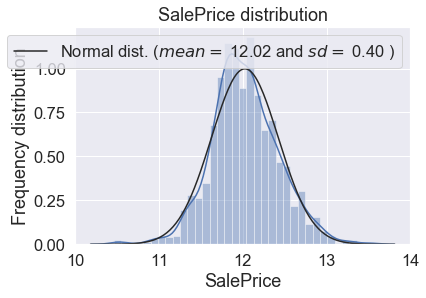

In [701]:
#check the distribution of SalePrice
house_price["SalePrice_log"] = np.log(house_price["SalePrice"])
#house_price["SalePrice"] = house_price["SalePrice"]
sns.distplot(np.log(house_price["SalePrice"]) , fit=norm);

# Get the fitted parameters used by the function
(mean, sd) = norm.fit(house_price['SalePrice_log'])
plt.legend(['Normal dist. ($mean=$ {:.2f} and $sd=$ {:.2f} )'.format(mean, sd)],loc='best')
plt.ylabel('Frequency distribution')
plt.title('SalePrice distribution')


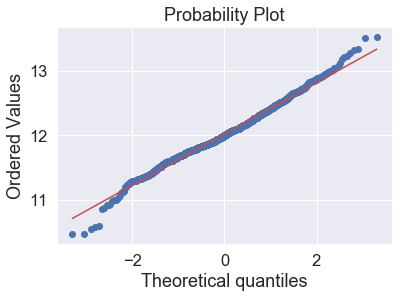

In [702]:
fig = plt.figure()
res = stats.probplot(house_price['SalePrice_log'], plot=plt)
plt.show()


### From the above plots show lesser skewed distribution. There are some data on upper and lower which are skewed.

In [703]:
house_price["SalePrice_log"].sort_values().head()

495    10.460242
916    10.471950
968    10.542706
533    10.578980
30     10.596635
Name: SalePrice_log, dtype: float64

In [704]:
house_price["SalePrice_log"].sort_values().tail()

803     13.275828
898     13.323927
1169    13.345507
1182    13.521139
691     13.534473
Name: SalePrice_log, dtype: float64

In [705]:
house_price = house_price[house_price["SalePrice_log"] < 13.5]
house_price = house_price[house_price["SalePrice_log"] > 10.5]

Text(0.5, 1.0, 'SalePrice distribution')

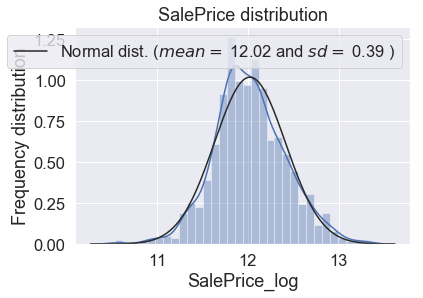

In [706]:
sns.distplot(house_price["SalePrice_log"] , fit=norm);

# Get the fitted parameters used by the function
(mean, sd) = norm.fit(house_price['SalePrice_log'])
plt.legend(['Normal dist. ($mean=$ {:.2f} and $sd=$ {:.2f} )'.format(mean, sd)],loc='best')
plt.ylabel('Frequency distribution')
plt.title('SalePrice distribution')

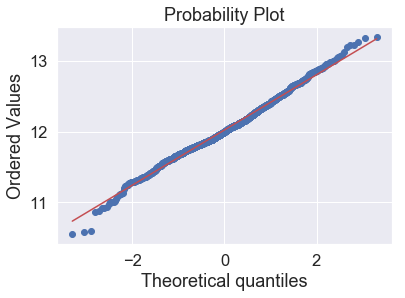

In [707]:
fig = plt.figure()
res = stats.probplot(house_price['SalePrice_log'], plot=plt)
plt.show()


### Outlier treatment for the values which have collinearity with Sale Price

In [708]:
target = house_price.SalePrice_log

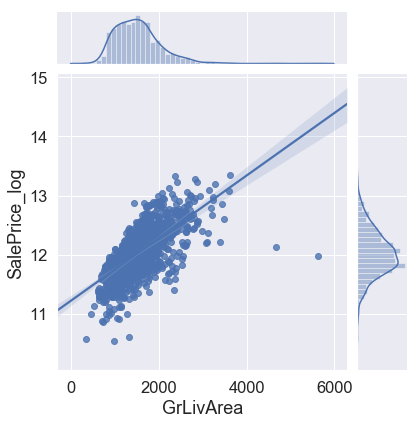

In [709]:
#Analysing the feature - ground living area 
# Living Area vs Sale Price
sns.jointplot(x=house_price['GrLivArea'], y=house_price['SalePrice_log'], kind='reg')

In [710]:
# Removing outliers manually
house_price = house_price.drop(house_price[(house_price['GrLivArea']>4000)  ].index).reset_index(drop=True)

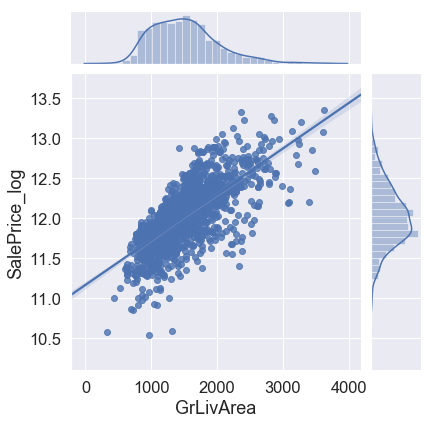

In [711]:
sns.jointplot(x=house_price['GrLivArea'], y=house_price['SalePrice_log'], kind='reg')

In [712]:
house_price.shape

(1453, 43)

## Convert some numerical features to Categorical as some of the categories have discrete values as 



MSSubClass,Condition2,HouseStyle,OverallQual,Exterior1st,Exterior2nd,Electrical,FullBath,KitchenAbvGr,BedroomAbvGr,Fireplaces

In [713]:
num_to_cat=["BedroomAbvGr","Fireplaces", "FullBath",
              "KitchenAbvGr", "MoSold", "MSSubClass","MSZoning", "OverallCond", 
            "OverallQual", "YrSold"]

house_price[num_to_cat] = house_price[num_to_cat].apply(lambda x: x.astype("str"))

In [714]:
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageCars,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,SalePrice_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,Y,2,2008,WD,Normal,208500,2566,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,1,2,Y,5,2007,WD,Normal,181500,2524,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,1,2,Y,9,2008,WD,Normal,223500,2706,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,1,3,Y,2,2006,WD,Abnorml,140000,2473,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,1,3,Y,12,2008,WD,Normal,250000,3343,12.429216


In [715]:
test_house_price[num_to_cat] = test_house_price[num_to_cat].apply(lambda x: x.astype("str"))

In [716]:
test_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,1,TA,0,1.0,Y,6,2010,WD,Normal,1778.0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,1,Gd,0,1.0,Y,6,2010,WD,Normal,2658.0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,1,TA,1,2.0,Y,3,2010,WD,Normal,2557.0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,1,Gd,1,2.0,Y,6,2010,WD,Normal,2530.0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,1,Gd,0,2.0,Y,1,2010,WD,Normal,2560.0


In [717]:
house_price.drop(['MSSubClass','Condition2','HouseStyle','OverallQual','Exterior1st','Exterior2nd','Electrical','FullBath','KitchenAbvGr','BedroomAbvGr','Fireplaces'],axis=1, inplace=True)

In [718]:
test_house_price.drop(['MSSubClass','Condition2','HouseStyle','OverallQual','Exterior1st','Exterior2nd','Electrical','FullBath','KitchenAbvGr','BedroomAbvGr','Fireplaces'],axis=1, inplace=True)

In [719]:
cat_feats = house_price.dtypes[house_price.dtypes == "object"].index
print(cat_feats)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'OverallCond',
       'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [720]:
cat_feats = house_price.dtypes[house_price.dtypes != "object"].index
print(cat_feats)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'HalfBath', 'GarageCars', 'SalePrice', 'TotalSF', 'SalePrice_log'],
      dtype='object')


In [721]:
print(test_house_price.dtypes[test_house_price.dtypes == "object"].index)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'OverallCond',
       'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [722]:
print(test_house_price.dtypes[test_house_price.dtypes != "object"].index)

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'GrLivArea', 'HalfBath', 'GarageCars', 'TotalSF'],
      dtype='object')


## Numerical Feature Skewness correction

In [723]:
numerical_features = house_price.dtypes[house_price.dtypes != "object"].index
#numerical_features = numerical_features.drop("SalePrice")
print(numerical_features)
skew_before_correction = house_price[numerical_features].apply(lambda x: skew(x.dropna()))
print(skew_before_correction)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'HalfBath', 'GarageCars', 'SalePrice', 'TotalSF', 'SalePrice_log'],
      dtype='object')
LotFrontage       1.533446
LotArea          12.561882
YearBuilt        -0.611880
YearRemodAdd     -0.501320
GrLivArea         0.840219
HalfBath          0.683420
GarageCars       -0.341657
SalePrice         1.575589
TotalSF           0.639460
SalePrice_log     0.137088
dtype: float64


In [724]:
numerical_features_test = test_house_price.dtypes[test_house_price.dtypes != "object"].index
print(numerical_features_test)
skew_before_correction_test = test_house_price[numerical_features_test].apply(lambda x: skew(x.dropna()))
print(skew_before_correction_test)

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'GrLivArea', 'HalfBath', 'GarageCars', 'TotalSF'],
      dtype='object')
Id              0.000838
LotFrontage     0.613806
LotArea         2.687007
YearBuilt      -0.599468
YearRemodAdd   -0.406844
GrLivArea       1.090733
HalfBath        0.710581
GarageCars     -0.112402
TotalSF         1.234679
dtype: float64


##  We want to lower the positive skewness as Skew value should be close to 0.

In [725]:
house_price_log = np.log1p(house_price[numerical_features])
skew_after_correction = house_price_log[numerical_features].apply(lambda x: skew(x.dropna()))
skew_correction_diff = (abs(skew_before_correction)-abs(skew_after_correction)).sort_values(ascending=False)
house_price[skew_correction_diff[skew_correction_diff>0].index] = np.log1p(house_price[skew_correction_diff[skew_correction_diff > 0].index])
skew_corrected = house_price[numerical_features].apply(lambda x: skew(x.dropna()))
print(skew_corrected)

LotFrontage     -1.016448
LotArea         -0.180267
YearBuilt       -0.611880
YearRemodAdd    -0.501320
GrLivArea       -0.094790
HalfBath         0.573133
GarageCars      -0.341657
SalePrice        0.137098
TotalSF         -0.512822
SalePrice_log    0.024844
dtype: float64


In [726]:
house_price.shape

(1453, 32)

In [727]:
house_price_log_test = np.log1p(test_house_price[numerical_features_test])
skew_after_correction_test = house_price_log_test[numerical_features_test].apply(lambda x: skew(x.dropna()))
skew_correction_diff_test = (abs(skew_before_correction_test)-abs(skew_after_correction_test)).sort_values(ascending=False)
test_house_price[skew_correction_diff_test[skew_correction_diff_test>0].index] = np.log1p(test_house_price[skew_correction_diff_test[skew_correction_diff_test > 0].index])
skew_corrected_test = test_house_price[numerical_features_test].apply(lambda x: skew(x.dropna()))
print(skew_corrected_test)

Id              0.000838
LotFrontage     0.613806
LotArea        -1.014816
YearBuilt      -0.599468
YearRemodAdd   -0.406844
GrLivArea       0.017358
HalfBath        0.591813
GarageCars     -0.112402
TotalSF        -0.334538
dtype: float64


In [728]:
test_house_price.shape

(1447, 31)

In [729]:
house_price_cat = house_price.select_dtypes(include=['object'])
house_price_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallCond,...,ExterCond,Foundation,HeatingQC,CentralAir,KitchenQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,5,...,TA,PConc,Ex,Y,Gd,Y,2,2008,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,8,...,TA,CBlock,Ex,Y,TA,Y,5,2007,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,5,...,TA,PConc,Ex,Y,Gd,Y,9,2008,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,5,...,TA,BrkTil,Gd,Y,Gd,Y,2,2006,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,5,...,TA,PConc,Ex,Y,Gd,Y,12,2008,WD,Normal


In [730]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 32 columns):
MSZoning         1453 non-null object
LotFrontage      1453 non-null float64
LotArea          1453 non-null float64
Street           1453 non-null object
LotShape         1453 non-null object
LandContour      1453 non-null object
LotConfig        1453 non-null object
LandSlope        1453 non-null object
Neighborhood     1453 non-null object
Condition1       1453 non-null object
BldgType         1453 non-null object
OverallCond      1453 non-null object
YearBuilt        1453 non-null int64
YearRemodAdd     1453 non-null int64
RoofStyle        1453 non-null object
ExterQual        1453 non-null object
ExterCond        1453 non-null object
Foundation       1453 non-null object
HeatingQC        1453 non-null object
CentralAir       1453 non-null object
GrLivArea        1453 non-null float64
HalfBath         1453 non-null float64
KitchenQual      1453 non-null object
GarageCars       

In [731]:
test_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1458
Data columns (total 31 columns):
Id               1447 non-null int64
MSZoning         1447 non-null object
LotFrontage      1447 non-null float64
LotArea          1447 non-null float64
Street           1447 non-null object
LotShape         1447 non-null object
LandContour      1447 non-null object
LotConfig        1447 non-null object
LandSlope        1447 non-null object
Neighborhood     1447 non-null object
Condition1       1447 non-null object
BldgType         1447 non-null object
OverallCond      1447 non-null object
YearBuilt        1447 non-null int64
YearRemodAdd     1447 non-null int64
RoofStyle        1447 non-null object
ExterQual        1447 non-null object
ExterCond        1447 non-null object
Foundation       1447 non-null object
HeatingQC        1447 non-null object
CentralAir       1447 non-null object
GrLivArea        1447 non-null float64
HalfBath         1447 non-null float64
KitchenQual      1

In [732]:
# subset all categorical variables
test_house_price_cat = test_house_price.select_dtypes(include=['object'])
test_house_price_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallCond,...,ExterCond,Foundation,HeatingQC,CentralAir,KitchenQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,6,...,TA,CBlock,TA,Y,TA,Y,6,2010,WD,Normal
1,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,6,...,TA,CBlock,TA,Y,Gd,Y,6,2010,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,5,...,TA,PConc,Gd,Y,TA,Y,3,2010,WD,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,6,...,TA,PConc,Ex,Y,Gd,Y,6,2010,WD,Normal
4,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,5,...,TA,PConc,Ex,Y,Gd,Y,1,2010,WD,Normal


In [733]:
test_house_price_cat.shape

(1447, 22)

In [734]:
test_house_price_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1458
Data columns (total 22 columns):
MSZoning         1447 non-null object
Street           1447 non-null object
LotShape         1447 non-null object
LandContour      1447 non-null object
LotConfig        1447 non-null object
LandSlope        1447 non-null object
Neighborhood     1447 non-null object
Condition1       1447 non-null object
BldgType         1447 non-null object
OverallCond      1447 non-null object
RoofStyle        1447 non-null object
ExterQual        1447 non-null object
ExterCond        1447 non-null object
Foundation       1447 non-null object
HeatingQC        1447 non-null object
CentralAir       1447 non-null object
KitchenQual      1447 non-null object
PavedDrive       1447 non-null object
MoSold           1447 non-null object
YrSold           1447 non-null object
SaleType         1447 non-null object
SaleCondition    1447 non-null object
dtypes: object(22)
memory usage: 260.0+ KB


In [735]:
house_price_cat.shape

(1453, 22)

In [736]:
test_house_price_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1458
Data columns (total 22 columns):
MSZoning         1447 non-null object
Street           1447 non-null object
LotShape         1447 non-null object
LandContour      1447 non-null object
LotConfig        1447 non-null object
LandSlope        1447 non-null object
Neighborhood     1447 non-null object
Condition1       1447 non-null object
BldgType         1447 non-null object
OverallCond      1447 non-null object
RoofStyle        1447 non-null object
ExterQual        1447 non-null object
ExterCond        1447 non-null object
Foundation       1447 non-null object
HeatingQC        1447 non-null object
CentralAir       1447 non-null object
KitchenQual      1447 non-null object
PavedDrive       1447 non-null object
MoSold           1447 non-null object
YrSold           1447 non-null object
SaleType         1447 non-null object
SaleCondition    1447 non-null object
dtypes: object(22)
memory usage: 260.0+ KB


In [737]:
house_price_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 22 columns):
MSZoning         1453 non-null object
Street           1453 non-null object
LotShape         1453 non-null object
LandContour      1453 non-null object
LotConfig        1453 non-null object
LandSlope        1453 non-null object
Neighborhood     1453 non-null object
Condition1       1453 non-null object
BldgType         1453 non-null object
OverallCond      1453 non-null object
RoofStyle        1453 non-null object
ExterQual        1453 non-null object
ExterCond        1453 non-null object
Foundation       1453 non-null object
HeatingQC        1453 non-null object
CentralAir       1453 non-null object
KitchenQual      1453 non-null object
PavedDrive       1453 non-null object
MoSold           1453 non-null object
YrSold           1453 non-null object
SaleType         1453 non-null object
SaleCondition    1453 non-null object
dtypes: object(22)
memory usage: 249.8+ KB


In [738]:
house_price_cat['LotShape'].value_counts()

Reg    922
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64

In [739]:
test_house_price_cat['MSZoning'].value_counts()

RL         1109
RM          239
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [740]:
house_price_dummies = pd.get_dummies(house_price_cat, drop_first=True)
house_price_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [741]:
test_house_price_dummies = pd.get_dummies(test_house_price_cat, drop_first=True)


In [742]:
test_house_price_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [743]:
# drop categorical variables 
house_price = house_price.drop(list(house_price_cat.columns), axis=1)

In [744]:
house_price.shape

(1453, 10)

In [745]:
house_price.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,SalePrice,TotalSF,SalePrice_log
0,4.189655,9.042040,2003,2003,7.444833,0.693147,2,12.247699,7.850493,2.583824
1,4.394449,9.169623,1976,1976,7.141245,0.000000,2,12.109016,7.833996,2.573300
2,4.234107,9.328212,2001,2002,7.488294,0.693147,2,12.317171,7.903596,2.589054
3,4.110874,9.164401,1915,1970,7.448916,0.000000,3,11.849405,7.813592,2.553297
4,4.442651,9.565284,2000,2000,7.695758,0.693147,3,12.429220,8.114923,2.597433


In [746]:
# concat dummy variables with X
house_price = pd.concat([house_price, house_price_dummies], axis=1)
house_price.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,SalePrice,TotalSF,SalePrice_log,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,2003,2003,7.444833,0.693147,2,12.247699,7.850493,2.583824,...,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.169623,1976,1976,7.141245,0.000000,2,12.109016,7.833996,2.573300,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,9.328212,2001,2002,7.488294,0.693147,2,12.317171,7.903596,2.589054,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,9.164401,1915,1970,7.448916,0.000000,3,11.849405,7.813592,2.553297,...,0,0,0,0,1,0,0,0,0,0
4,4.442651,9.565284,2000,2000,7.695758,0.693147,3,12.429220,8.114923,2.597433,...,0,0,0,0,1,0,0,0,1,0


In [747]:
# drop categorical variables 
test_house_price = test_house_price.drop(list(test_house_price_cat.columns), axis=1)

In [748]:
test_house_price.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF
0,1461,80.0,9.360741,1961,1961,6.799056,0.000000,1.0,7.483807
1,1462,81.0,9.565775,1958,1958,7.192934,0.693147,1.0,7.885705
2,1463,74.0,9.534668,1997,1998,7.396335,0.693147,2.0,7.846981
3,1464,78.0,9.208238,1998,1998,7.380879,0.693147,2.0,7.836370
4,1465,43.0,8.518392,1992,1992,7.155396,0.000000,2.0,7.848153


In [749]:
# concat dummy variables with X
test_house_price = pd.concat([test_house_price, test_house_price_dummies], axis=1)
test_house_price.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF,MSZoning_FV,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,9.360741,1961,1961,6.799056,0.000000,1.0,7.483807,0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,9.565775,1958,1958,7.192934,0.693147,1.0,7.885705,0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,9.534668,1997,1998,7.396335,0.693147,2.0,7.846981,0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9.208238,1998,1998,7.380879,0.693147,2.0,7.836370,0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,8.518392,1992,1992,7.155396,0.000000,2.0,7.848153,0,...,0,0,0,0,1,0,0,0,1,0


In [750]:
test_house_price.to_csv('test_list.csv')

In [751]:
house_price.to_csv('train_list.csv')

### No null values in all columns

In [752]:
sum(house_price.isnull().sum() != 0)

0

In [753]:
X=house_price.drop(['SalePrice','SalePrice_log'],axis=1)
Y=np.log(house_price['SalePrice'])

In [754]:
print(house_price['SalePrice'])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1423    12.165985
1424    11.875838
1425    11.074436
1426    12.136192
1427    11.982935
1428    12.066816
1429    11.699413
1430    12.885673
1431    11.916395
1432    12.190964
1433    12.160034
1434    11.913720
1435    12.644331
1436    11.703554
1437    12.098493
1438    11.767575
1439    11.969724
1440    12.388398
1441    11.626263
1442    11.429555
1443    11.820418
1444    12.567555
1445    11.884496
1446    11.344519
1447    12

In [755]:
Y.head()

0    2.505338
1    2.493950
2    2.510994
3    2.472278
4    2.520050
Name: SalePrice, dtype: float64

In [756]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [757]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 124 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(5), int64(3), uint8(116)
memory usage: 255.5 KB


## Splitting in training and test

In [758]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## R square of train and test in Linear regression

In [759]:
from sklearn import linear_model
# linear regression
lm = LinearRegression()
model=lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#R square value
#print('R square is: {}'.format(model.score(X_test, y_test)))

0.9198158527194834


In [760]:

y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8716663519057303


In [761]:

#predicting on the test set
predictions = model.predict(X_test)

In [762]:
#evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

RMSE is 0.00012696578611719994


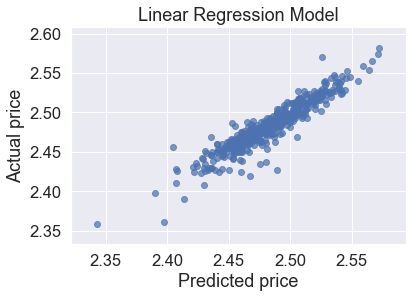

In [763]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.7, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

#### the above plot shows still there is some improvement done on the data 

## L1 regularization(Lasso Regression)
### Let us validate the required feature selection

In [764]:

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.01, 1.0, 5.0, 10.0,100,1000]}

# grid search
# lasso model
model_ls = Lasso()
model_cv = GridSearchCV(estimator = model_ls, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 5.0, 10.0, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [765]:
model_cv.best_params_


{'alpha': 0.0001}

In [766]:
model_cv.best_score_

0.8811028012341763

In [767]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0280,0.006261,0.0010,1.168008e-07,0.0001,{'alpha': 0.0001},0.879780,0.882110,0.892438,0.860894,...,0.881103,0.011162,1,0.898580,0.896439,0.896780,0.905078,0.895060,0.898388,0.003528
1,0.0106,0.002653,0.0008,3.999710e-04,0.001,{'alpha': 0.001},0.813262,0.794075,0.851351,0.817914,...,0.818338,0.018514,2,0.820841,0.825553,0.817365,0.824461,0.821628,0.821970,0.002886
2,0.0048,0.001166,0.0008,7.483537e-04,0.01,{'alpha': 0.01},0.422244,0.388350,0.453557,0.435008,...,0.421604,0.022207,3,0.427699,0.435927,0.419522,0.424855,0.430269,0.427654,0.005463
3,0.0044,0.000490,0.0010,1.168008e-07,1,{'alpha': 1.0},-0.000049,-0.004200,-0.002967,-0.001188,...,-0.003385,0.002942,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0048,0.000748,0.0004,4.898624e-04,5,{'alpha': 5.0},-0.000049,-0.004200,-0.002967,-0.001188,...,-0.003385,0.002942,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


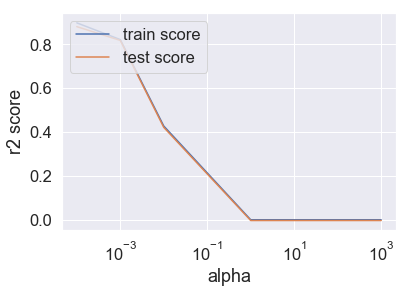

In [768]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log')
plt.show()

### Optimum Alpha

In [769]:
alpha =.0001

lasso = Lasso(alpha=alpha)
        
model_ls=lasso.fit(X_train, y_train) 

## R square of train and test in Lasso

In [770]:
y_train_pred =lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8965712541725525
0.8762338850886007


In [771]:
#Return the result in pre-defined format
rss = sum((y_test_pred-y_test)**2)
print(rss)

0.053386864366269306


In [772]:
#predicting on the test set
predictions_ls = model_ls.predict(X_test)

In [773]:
#evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE in Lasso is {}'.format(mean_squared_error(y_test, predictions_ls)))

RMSE in Lasso is 0.00012244693661988377


In [774]:
# lasso model parameters
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.309),
 ('LotFrontage', 0.0),
 ('LotArea', 0.008),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('GrLivArea', 0.02),
 ('HalfBath', 0.001),
 ('GarageCars', 0.006),
 ('TotalSF', 0.033),
 ('MSZoning_FV', 0.004),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.002),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.001),
 ('LotConfig_CulDSac', 0.001),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('LandSlope_Mod', 0.0),
 ('LandSlope_Sev', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.003),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.01),
 ('Neighborhood_Edwards', -0.004),
 ('Neighborhood_Gilbert', -0.002),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_Mitchel', -0

In [775]:
coeff_used001 = np.sum(lasso.coef_!=0)
coeff_used001

51

### If the coefficient is high either in positive or high in negative, both cases have high impact on target variable.
### features with coefficient close to zero will have less impact on target variable.
### features with zero coefficient has no impact on target variable.

In [776]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF,MSZoning_FV,MSZoning_RH,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
848,3.784190,8.069968,2003,2003,7.284135,0.000000,2,7.912057,0,0,...,0,0,0,0,1,0,0,0,1,0
25,4.709530,9.563178,2007,2007,7.378384,0.000000,3,8.060540,0,0,...,0,0,0,0,1,0,0,0,1,0
88,4.663439,9.044404,1915,1982,7.331060,0.000000,0,7.614312,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,4.276666,9.234740,1965,2001,6.867974,0.000000,1,7.383368,0,0,...,0,0,0,0,1,0,0,0,1,0
1160,4.234107,9.690171,1978,1978,7.267525,0.693147,2,7.934872,0,0,...,0,0,0,0,1,0,0,0,1,0


In [777]:
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF,MSZoning_FV,MSZoning_RH,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
981,4.234107,9.294773,1950,1950,7.060476,0.000000,1,7.753194,0,0,...,0,0,0,0,0,0,0,0,1,0
1179,3.931826,10.466925,1963,1963,7.360740,0.693147,3,8.053569,0,0,...,0,0,0,0,1,0,0,0,1,0
619,4.510860,9.287394,1974,1997,7.869019,0.693147,2,8.327726,0,0,...,0,0,0,0,1,0,0,0,1,0
376,4.060443,9.087834,1996,1996,6.818924,0.000000,2,7.487174,0,0,...,0,0,0,0,1,0,0,0,1,0
1162,4.174387,9.256842,2008,2008,7.435438,0.000000,3,8.128290,0,0,...,0,0,0,0,1,0,0,0,1,0


### L2 regularization(Ridge Regression)

In [778]:
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.01, 1.0, 5.0, 10.0,100,1000]}

# grid search
# Ridge model
model_rd = Ridge()
model_cv = GridSearchCV(estimator = model_rd, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 5.0, 10.0, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [779]:
model_cv.best_params_

{'alpha': 5.0}

In [780]:
model_cv.best_score_

0.887132162389069

In [781]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0110,4.560706e-03,0.0012,4.001617e-04,0.0001,{'alpha': 0.0001},0.887869,0.880763,0.879417,0.861569,...,0.878048,0.008756,6,0.924043,0.920793,0.921572,0.928325,0.921536,0.923254,0.002763
1,0.0066,1.743543e-03,0.0010,1.168008e-07,0.001,{'alpha': 0.001},0.887914,0.880864,0.879453,0.861572,...,0.878097,0.008776,5,0.924043,0.920792,0.921572,0.928325,0.921536,0.923254,0.002763
2,0.0074,1.959601e-03,0.0008,4.000425e-04,0.01,{'alpha': 0.01},0.888320,0.881740,0.879815,0.861599,...,0.878536,0.008955,4,0.924029,0.920777,0.921566,0.928324,0.921529,0.923245,0.002766
3,0.0054,1.743581e-03,0.0008,3.999710e-04,1,{'alpha': 1.0},0.891547,0.889712,0.892814,0.862644,...,0.886465,0.012047,2,0.920276,0.917501,0.918204,0.925907,0.918398,0.920057,0.003066
4,0.0040,9.536743e-08,0.0010,1.907349e-07,5,{'alpha': 5.0},0.887634,0.888048,0.897131,0.863979,...,0.887132,0.012435,1,0.913107,0.910739,0.911117,0.919204,0.910554,0.912944,0.003260


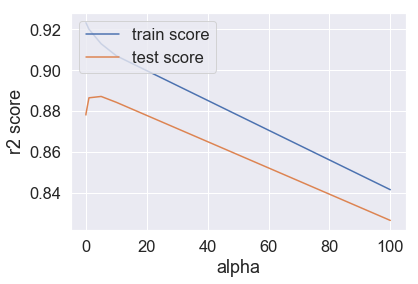

In [782]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [783]:
#L2 Regularization
alpha = 5
ridge = Ridge(alpha=alpha)

model_rd=ridge.fit(X_train, y_train)
print('R square is: {}'.format(model_rd.score(X_train, y_train)))
#R square value
print('R square is: {}'.format(model_rd.score(X_test, y_test)))
#ridge.coef_

R square is: 0.911582534208263
R square is: 0.8832527941108309


In [784]:
#predicting on the test set
predictions_rd = model_rd.predict(X_test)

In [785]:
#evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE in Ridge is {}'.format(mean_squared_error(y_test, predictions_rd)))

RMSE in Ridge is 0.00011550283961238695


In [786]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_new.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.406),
 ('LotArea', 0.002),
 ('GrLivArea', 0.009),
 ('GarageCars', 0.0),
 ('TotalSF', 0.0),
 ('MSSubClass_30', 0.021),
 ('MSSubClass_50', 0.002),
 ('MSZoning_FV', 0.005),
 ('MSZoning_RM', 0.028),
 ('LotConfig_CulDSac', 0.007),
 ('Neighborhood_BrkSide', 0.002),
 ('Neighborhood_CollgCr', 0.005),
 ('Neighborhood_Crawfor', 0.003),
 ('Neighborhood_Edwards', 0.007),
 ('Neighborhood_Gilbert', -0.002),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_NWAmes', -0.0),
 ('Neighborhood_NridgHt', 0.003),
 ('Condition1_Norm', 0.0),
 ('Condition2_RRNn', -0.001),
 ('OverallQual_10', 0.002),
 ('OverallQual_3', -0.003),
 ('OverallQual_4', -0.002),
 ('OverallQual_5', -0.0),
 ('OverallQual_7', 0.001),
 ('OverallQual_8', -0.002),
 ('OverallQual_9', 0.002),
 ('OverallCond_3', 0.0),
 ('OverallCond_4', 0.002),
 ('OverallCond_5', 0.001),
 ('OverallCond_7', -0.002),
 ('OverallCond_8', 0.01),
 ('OverallCond_9', -0.006),
 ('Exterior1st_BrkFace', -0.005),
 ('Exterior1st_Wd Sdng', -0.004),
 ('ExterQua

In [787]:
test_house_price.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF,MSZoning_FV,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,9.360741,1961,1961,6.799056,0.000000,1.0,7.483807,0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,9.565775,1958,1958,7.192934,0.693147,1.0,7.885705,0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,9.534668,1997,1998,7.396335,0.693147,2.0,7.846981,0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9.208238,1998,1998,7.380879,0.693147,2.0,7.836370,0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,8.518392,1992,1992,7.155396,0.000000,2.0,7.848153,0,...,0,0,0,0,1,0,0,0,1,0


In [788]:
test_id=test_house_price.iloc[:,0]

test_id=pd.DataFrame(test_id)
test_id.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [789]:
test_final_price=test_house_price.iloc[:,1:125]
test_final_price.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,GarageCars,TotalSF,MSZoning_FV,MSZoning_RH,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,9.360741,1961,1961,6.799056,0.000000,1.0,7.483807,0,1,...,0,0,0,0,1,0,0,0,1,0
1,81.0,9.565775,1958,1958,7.192934,0.693147,1.0,7.885705,0,0,...,0,0,0,0,1,0,0,0,1,0
2,74.0,9.534668,1997,1998,7.396335,0.693147,2.0,7.846981,0,0,...,0,0,0,0,1,0,0,0,1,0
3,78.0,9.208238,1998,1998,7.380879,0.693147,2.0,7.836370,0,0,...,0,0,0,0,1,0,0,0,1,0
4,43.0,8.518392,1992,1992,7.155396,0.000000,2.0,7.848153,0,0,...,0,0,0,0,1,0,0,0,1,0


In [790]:
test_final_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1458
Columns: 124 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(6), int64(2), uint8(116)
memory usage: 265.7 KB


In [793]:
pred=lasso.predict(test_final_price)
preds=np.exp(np.exp(pred))

In [794]:
output=pd.DataFrame({'Id':test_id.Id, 'SalePrice':preds})

In [795]:
output.head()

,Id,SalePrice
0,1461,110099.953172
1,1462,160776.883411
2,1463,194416.709456
3,1464,198043.742265
4,1465,191241.904693


## Final Findings
## 1.Which variables are significant in predicting the price of a house?
### a. TotalSF(BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF)
### b. GrLivArea
### c.Overall condition,neighbourhood and Overall quality etc. These variables are listed above.

## 2. How well those variables describe the price of a house?
### variables with positive co-efficients support towards incease in Sale Price. 
###  Variables with negative co-efficients support towards decrease in Sale Price. 

## 3. Using Lasso the features reduced from 41 to 21, also the significant variables can be easily fetched.
## 4.R square of train and test in Lasso is 91.3%, 88.3%
## 5.R square of train and test in Lasso is 91.3%, 88.8%, there is a slight increase.
## 6. RMSE is also less. 